In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams['axes.grid'] = False
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

In [4]:

from Strategies.RSI.RSI import RSI
from Metrics.Metrics import SharpeRatio

1) This is a demo strategy based on on the RSI indicator. 
2) The input params to the strategy is [a,b,c] where a = Lookback for RSI, b=lower bound and c=upper bound. 
3) A buy signal is created when RSI crosses over lower bound from bottom to top. 
4) A sell signal is created when RSI crosses over upper bound from top to bottom.

Demonstrating Backtest

[*********************100%***********************]  1 of 1 completed


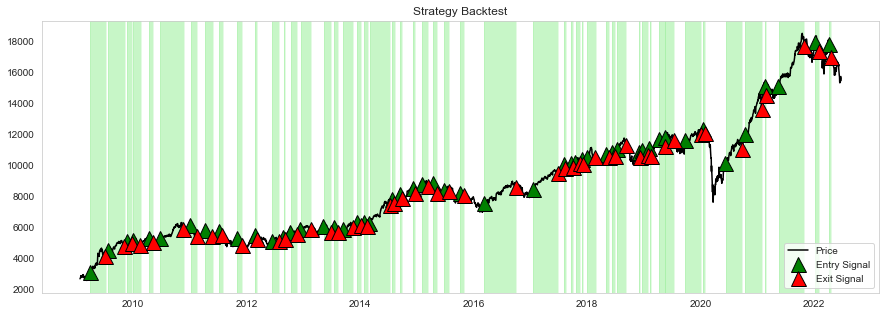

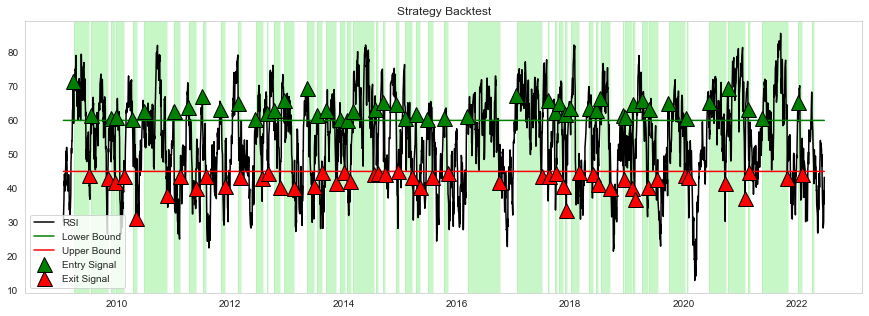

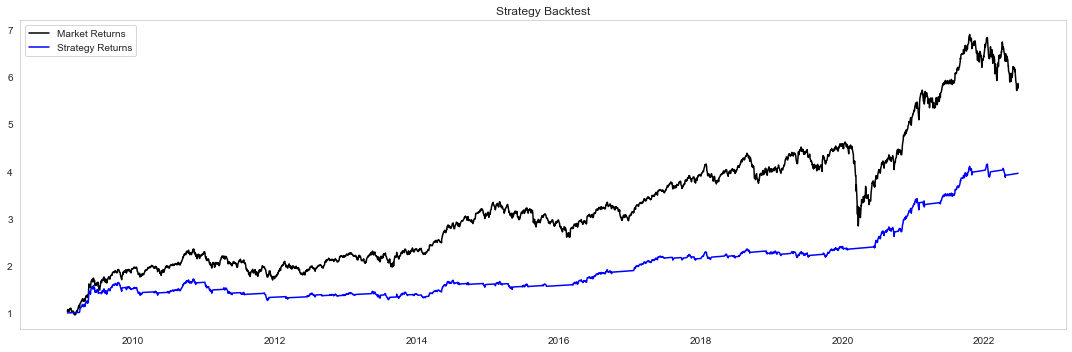

<Figure size 1080x360 with 0 Axes>

In [5]:
strat = RSI()
strat.get_data("^NSEI", "D")
params = [14, 45, 60]    
strat.data = strat.add_features(strat.data, [[param] for param in params])
_, ec = strat.do_backtest(params, allocation = 1, interest_rate = 6,  plot=True, save_plot_to=None)

Demonstrating the Parametric Optimisation Process

In [7]:
from BacktestOptimiser.BacktestOptimiser import BacktestOptimiser
from Utils.utils import correlation_filter

In [49]:
optimiser = BacktestOptimiser(strategy = RSI, ticker = "^NSEI", data_frequency = 'D')

print("Getting data")
optimiser.get_data()

print("Creating Dates")
optimiser.create_dates("3_Months")

print("Adding features")
optimiser.add_features()

print("run_backtests"),
optimiser.run_backtests(use_optimiser="BruteForce",parallelize=True)

print("Selecting Strategies")
optimiser.select_strategies(use_optimiser = "BruteForce",parallelize=True)

# print("Checking Selected Strategies")
# optimiser.check_selected_strategies(forward_months=2)

print("Filtering Strategies")
optimiser.filter_strategies(filter_function = correlation_filter)

print("Optimizing weights")
optimiser.optimize_weights()

print("Selecting best and mailing results")
optimiser.select_best_and_mail_results()



Getting data
[*********************100%***********************]  1 of 1 completed
Creating Dates
Adding features
run_backtests
Selecting Strategies
24_Done
Filtering Strategies
Calculating sharpe of collected metrics


100%|██████████| 51/51 [00:01<00:00, 33.41it/s]


Using filter


100%|██████████| 51/51 [00:04<00:00, 12.37it/s]

Optimizing weights
Selecting best and mailing results


<Figure size 1080x360 with 0 Axes>